In [2]:
#NYPD_Motor_Vehicle_Collisions

In [3]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as scio
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
#EDA and Preprocesing

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.manifold import TSNE

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score, cross_validate

#Supervised models
    
    #Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
    
    #Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, KDTree
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import make_scorer, roc_auc_score, f1_score, normalized_mutual_info_score,adjusted_rand_score, average_precision_score
from sklearn.metrics import zero_one_loss, classification_report, recall_score, precision_score, confusion_matrix

#Unsupervised Models

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
    
    #Dimensionality Reduction
from sklearn.decomposition import PCA, NMF, TruncatedSVD, LatentDirichletAllocation


#IMBLEARN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
from scipy.stats import zscore

path = '\srinidhi\Documents\Courses\Spring_2018\EDA\Project'

from datetime import datetime
from astral import Astral


## 1. Collisions data from the NYC open data website:

In [4]:
df= pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")

/Users/srinidhi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,9,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Weather data for NYC(JFK Airport) from the NOAA website

In [11]:
df_weather= pd.read_csv("jfk_weather_info.csv")

In [13]:
#identifier_cols(df)

[('DATE', 'Date/Time saved as string'),
 ('TIME', 'Date/Time saved as string'),
 ('BOROUGH', 'String/Object'),
 ('ZIP CODE', 'String/Object'),
 ('LATITUDE', 'Real Value'),
 ('LONGITUDE', 'Real Value'),
 ('LOCATION', 'String/Object'),
 ('ON STREET NAME', 'String/Object'),
 ('CROSS STREET NAME', 'String/Object'),
 ('OFF STREET NAME', 'String/Object'),
 ('NUMBER OF PERSONS INJURED', 'Integer'),
 ('NUMBER OF PERSONS KILLED', 'Integer'),
 ('NUMBER OF PEDESTRIANS INJURED', 'Integer'),
 ('NUMBER OF PEDESTRIANS KILLED', 'Integer'),
 ('NUMBER OF CYCLIST INJURED', 'Integer'),
 ('NUMBER OF CYCLIST KILLED', 'Integer'),
 ('NUMBER OF MOTORIST INJURED', 'Integer'),
 ('NUMBER OF MOTORIST KILLED', 'Integer'),
 ('CONTRIBUTING FACTOR VEHICLE 1', 'String/Object'),
 ('CONTRIBUTING FACTOR VEHICLE 2', 'String/Object'),
 ('CONTRIBUTING FACTOR VEHICLE 3', 'String/Object'),
 ('CONTRIBUTING FACTOR VEHICLE 4', 'String/Object'),
 ('CONTRIBUTING FACTOR VEHICLE 5', 'String/Object'),
 ('UNIQUE KEY', 'Integer'),
 ('VE

In [11]:
#shudhi_stats(df) - function defined and removed

,Feature,count,# Unique,# Missing,#Outliers,mean,median,min,max
0,DATE,1245254,2114,0,,,,,
1,TIME,1245254,1440,0,,,,,
2,BOROUGH,1245254,5,356613,,,,,
3,ZIP CODE,1245254,417,356711,,,,,
4,LATITUDE,1245254,121221,217065,0,40.71,40.72,0,41.1262
5,LONGITUDE,1245254,107278,217065,0,-73.92,-73.93,-201.36,0
6,LOCATION,1245254,156597,217065,,,,,
7,ON STREET NAME,1245254,10404,244953,,,,,
8,CROSS STREET NAME,1245254,16564,317016,,,,,
9,OFF STREET NAME,1245254,99018,1048226,,,,,


### Add frequently used values as features

In [5]:
df['date_time']= pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [7]:
df[df['date_time'] > pd.to_datetime('01/01/2016')]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              204778
Driver Inattention/Distraction                            97331
Following Too Closely                                     35680
Failure to Yield Right-of-Way                             29209
Backing Unsafely                                          19757
Passing or Lane Usage Improper                            16573
Unsafe Lane Changing                                      13960
Other Vehicular                                           12220
Turning Improperly                                        11685
Traffic Control Disregarded                                7718
Driver Inexperience                                        7332
Reaction to Other Uninvolved Vehicle                       5884
Unsafe Speed                                               5682
Fatigued/Drowsy                                            5650
Pavement Slippery                                          5054
Alcohol Involvement                     

In [6]:
df['DATE']=df['date_time'].dt.date

In [7]:
df['Day of week']= df['date_time'].dt.dayofweek

In [8]:
df['weekend'] = np.where(df['Day of week']>=5, 1, 0)

In [9]:
df['hour']= df['date_time'].dt.hour

In [10]:
df['hour'].value_counts()

16    92966
17    90190
14    85191
18    79134
15    77561
13    73908
8     70330
12    69913
9     69406
11    66126
19    64330
10    64001
20    53431
21    44029
22    39636
7     35066
0     33745
23    32189
6     25628
1     19525
5     16322
4     14940
2     14909
3     12778
Name: hour, dtype: int64

In [59]:
df['DATE'].min()

'01/01/2013'

In [12]:
df_weather['DATE']= pd.to_datetime(df.l/_weather['DATE']).dt.date

AttributeError: 'DataFrame' object has no attribute 'l'

### Data Sanity Check

In [17]:
shudhi_stats(df_weather)

,Feature,count,# Unique,# Missing,#Outliers,mean,median,min,max
0,DATE,1826,1826,0,,,,,
1,AWND_m_s,1826,106,0,0,5.05,4.8,0.9,12.9
2,PRCP,1826,130,0,0,2.84,0,0,118.9
3,SNOW,1826,39,0,0,2.53,0,0,770
4,SNWD,1826,21,0,0,8.6,0,0,710
5,TAVG,1826,363,90,0,13.5,14.1,-13.1,30.8
6,TMAX,1826,89,0,0,17.13,17.8,-8.2,37.8
7,TMIN,1826,96,0,0,9.01,8.9,-17.1,27.8
8,WT01,1826,1,1324,0,1,1,1,1
9,WT02,1826,1,1742,0,1,1,1,1


In [ ]:
df_final = df.merge(df_weather, on='DATE', how='left')

In [ ]:
df_final['TAVG']= (df_final['TMAX']+df_final['TMIN'])/2

In [ ]:
# Creating weather fields:

df_final['hot'] = np.where(df_final['TMAX']>25, 1, 0)
df_final['fog'] = np.where((df_final['WT01'] ==1.0) | (df_final['WT02'] ==1.0) | (df_final['WT22'] ==1.0), 1, 0)
df_final['rain']= np.where((df_final['WT15'] ==1.0) | (df_final['WT16'] ==1.0) , 1, 0)


In [19]:
shudhi_stats(df_final)

,Feature,count,# Unique,# Missing,#Outliers,mean,median,min,max
0,DATE,1245254,2114,0,,,,,
1,TIME,1245254,1440,0,,,,,
2,BOROUGH,1245254,5,356613,,,,,
3,ZIP CODE,1245254,417,356711,,,,,
4,LATITUDE,1245254,121221,217065,0,40.71,40.72,0,41.1262
5,LONGITUDE,1245254,107278,217065,0,-73.92,-73.93,-201.36,0
6,LOCATION,1245254,156597,217065,,,,,
7,ON STREET NAME,1245254,10404,244953,,,,,
8,CROSS STREET NAME,1245254,16564,317016,,,,,
9,OFF STREET NAME,1245254,99018,1048226,,,,,


## Hypothesis:

1. Factors possibly affecting accidents:
    1. Location
    2. Daylight: Yes/ No
    3. Time of Day: Hour of day, 
                    EMorn: 4-8; Morn: 8-12; Aft: 12-16; Eve: 16-20; Night: 20-24; L Night: 0-4
    4. Weather: Temp, Rain, Prec, Snow, Fog
                Extreme weather
                
    5. Day of week
    6. Presence of Offices(morn), Pubs(late night)


In [ ]:
#[(np.abs(zscore(df_final)) > 2).all(axis=1)]

In [ ]:
plt.hist(df_weather['TMAX'])
plt.boxplot(df_weather['TMAX'])
plt.show()

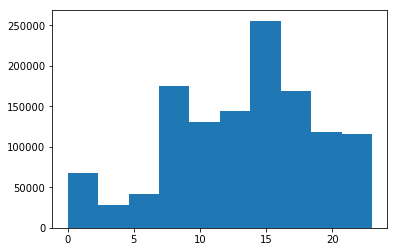

In [33]:
plt.hist(df_final['hour'])
plt.show()

In [55]:
pd.DataFrame.to_csv(df_final)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


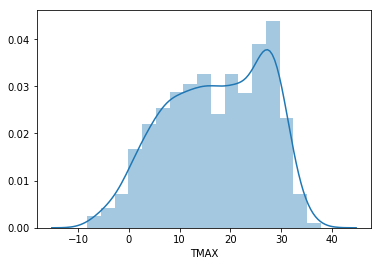

In [15]:
sns.distplot(df_weather['TMAX'])
#plt.boxplot(df_weather['TMAX'])
plt.show()

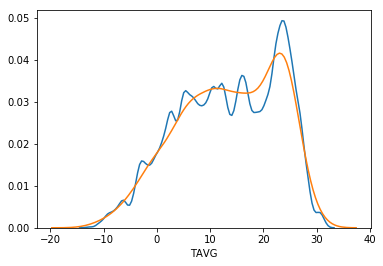

In [191]:
sns.distplot(df_final['TAVG'].dropna(), hist=False, kde=True)
sns.distplot(df_weather['TAVG'].dropna(), hist=False)

plt.show()

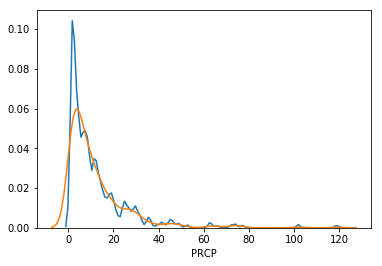

In [139]:
sns.distplot(df_final[df_final['PRCP']>1]['PRCP'].dropna(), hist=False)
sns.distplot(df_weather[df_weather['PRCP']>1]['PRCP'].dropna(), hist=False)

plt.show()

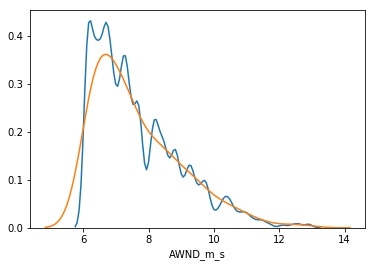

In [192]:
sns.distplot(df_final[df_final['AWND_m_s']>6]['AWND_m_s'].dropna(), hist=False, kde=True)
sns.distplot(df_weather[df_weather['AWND_m_s']>6]['AWND_m_s'].dropna(), hist=False)

plt.show()

In [171]:
df_final[(df_final['hour']<5)]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()


Unspecified                                              44662
Driver Inattention/Distraction                           13355
Alcohol Involvement                                       4205
Failure to Yield Right-of-Way                             2922
Other Vehicular                                           2722
Fatigued/Drowsy                                           2511
Traffic Control Disregarded                               2334
Backing Unsafely                                          2194
Following Too Closely                                     2189
Turning Improperly                                        2033
Pavement Slippery                                         1540
Driver Inexperience                                       1325
Passing or Lane Usage Improper                            1232
Unsafe Speed                                              1212
Lost Consciousness                                        1174
Prescription Medication                                

In [204]:
df_final.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'date_time', 'Day of week', 'weekend', 'hour',
       'AWND_m_s', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09', 'WT13', 'WT14', 'WT15',
       'WT16', 'WT18', 'WT22', 'hot', 'fog', 'rain'],
  

### Exploring "Unspecified"
#### Reason "Unspecified": Same number of injuries either way. "Minor" accidents are not being ignored and time of day is not likely a factor

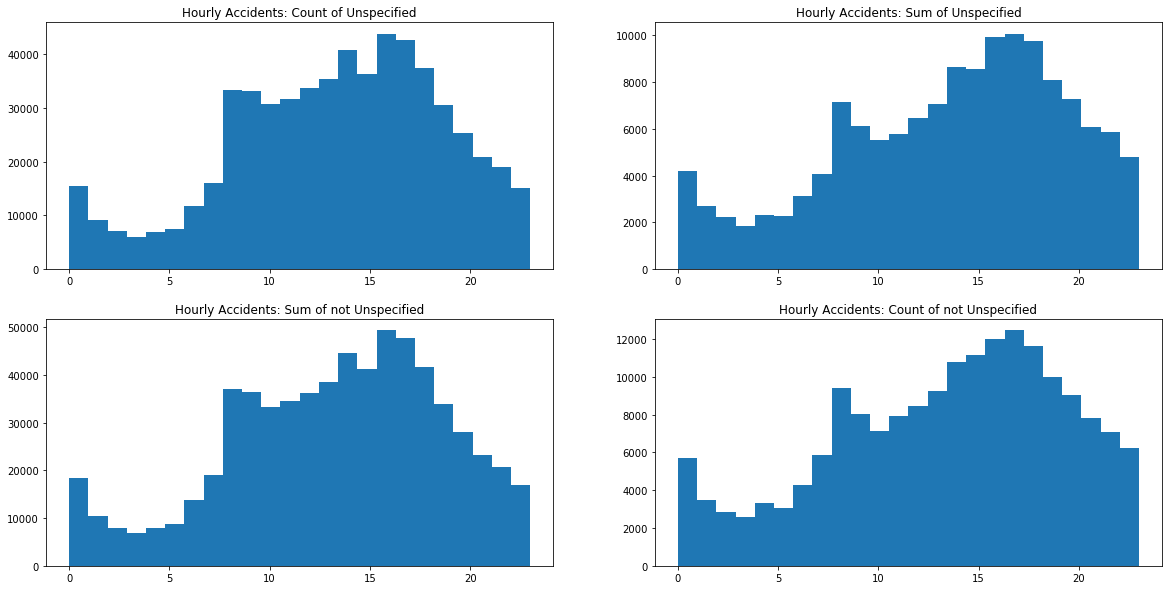

In [230]:
plt.subplots(2, 2, figsize=(20, 10))

plt.subplot(2, 2 , 1)
plt.hist(np.arange(24), weights=pd.DataFrame(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']=='Unspecified')].groupby(['hour'])['NUMBER OF PERSONS INJURED'].count().reset_index())['NUMBER OF PERSONS INJURED'], bins=24)
plt.title("Hourly Accidents: Count of Unspecified")

plt.subplot(2, 2 , 2)
plt.hist(np.arange(24), weights=pd.DataFrame(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']=='Unspecified')].groupby(['hour'])['NUMBER OF PERSONS INJURED'].sum().reset_index())['NUMBER OF PERSONS INJURED'], bins=24)
plt.title("Hourly Accidents: Sum of Unspecified")

plt.subplot(2, 2 , 3)
plt.hist(np.arange(24), weights=pd.DataFrame(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']!='Unspecified')].groupby(['hour'])['NUMBER OF PERSONS INJURED'].count().reset_index())['NUMBER OF PERSONS INJURED'], bins=24)
plt.title("Hourly Accidents: Sum of not Unspecified")

plt.subplot(2, 2 , 4)
plt.hist(np.arange(24), weights=pd.DataFrame(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']!='Unspecified')].groupby(['hour'])['NUMBER OF PERSONS INJURED'].sum().reset_index())['NUMBER OF PERSONS INJURED'], bins=24)
plt.title("Hourly Accidents: Count of not Unspecified")

plt.show()

## Exploratory Data Analysis

### Time and Reason Study
#### -Alcohol involvement: Peak around 3-4 AM on weekends
#### -Deaths in an accident more likely to occur in the night! 
#### -Serious accidents (more injuries) happen in the night too
#### -Pedestrians get injured round the clock, but, again, more likely to die in the night

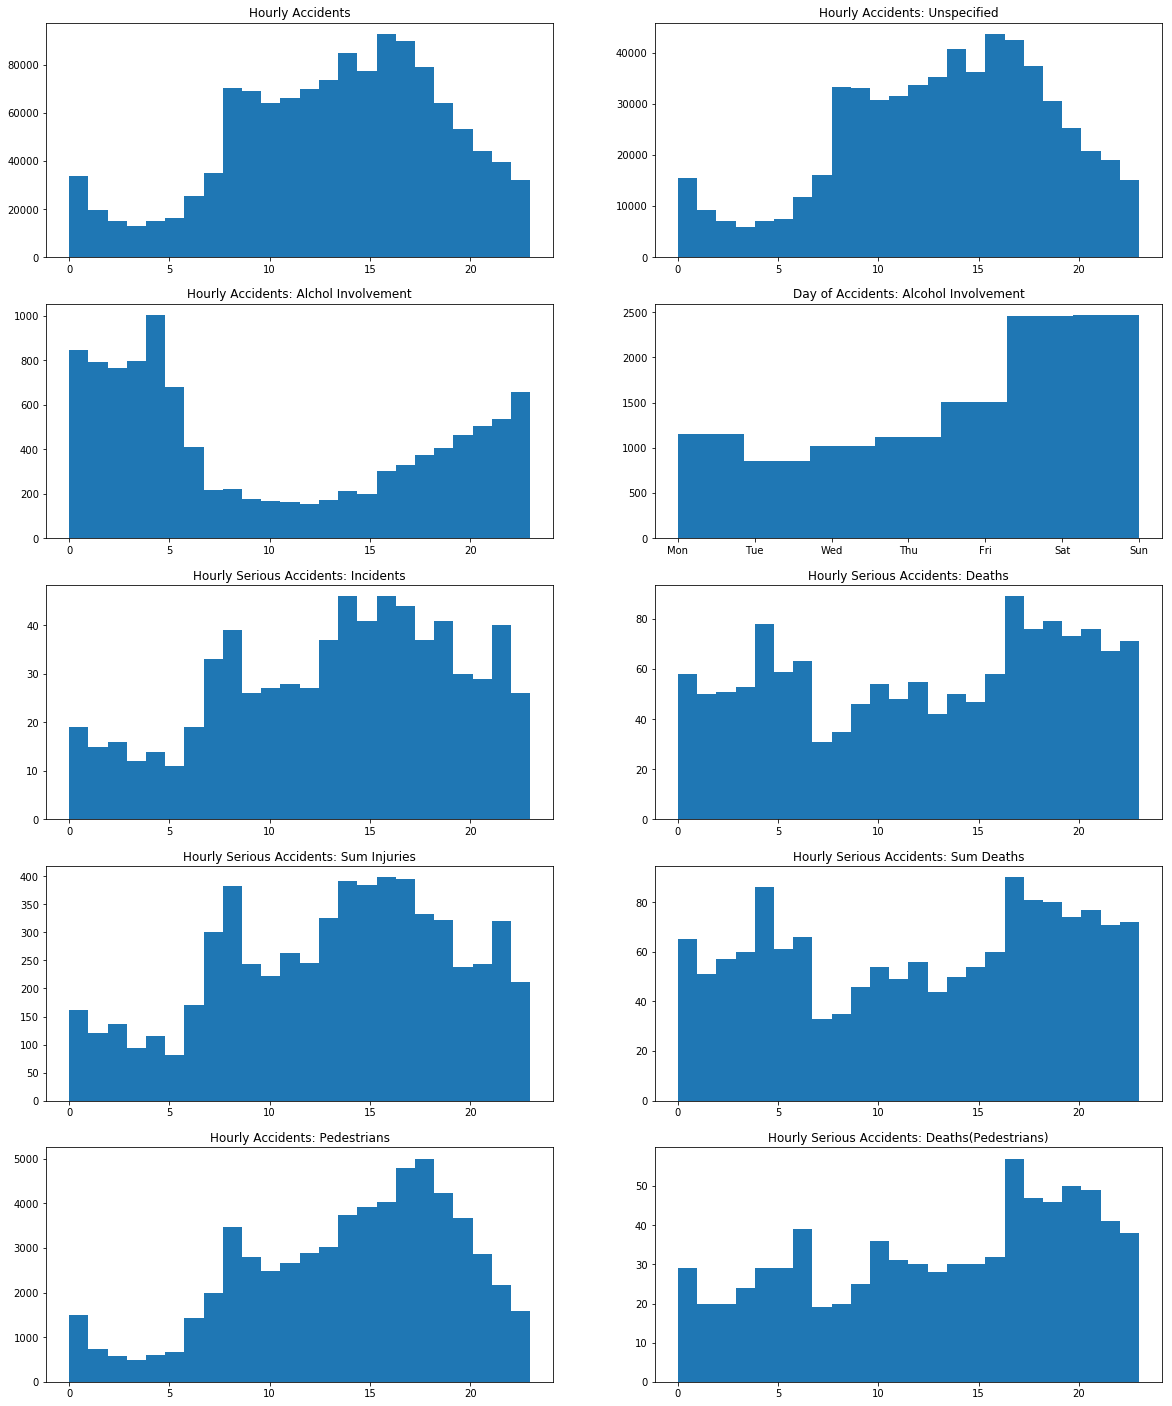

In [221]:
#Time and Reason for accident

plt.subplots(5, 2, figsize=(20, 25))
plt.subplot(5, 2 , 1)
plt.hist(df_final['hour'], bins=24)
plt.title("Hourly Accidents")

plt.subplot(5, 2, 2)
plt.hist(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']=='Unspecified')]['hour'], bins=24)
plt.title("Hourly Accidents: Unspecified")

#Study of Alcohol Involvement
plt.subplot(5, 2, 3)
plt.hist(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']=='Alcohol Involvement')]['hour'], bins=24)
plt.title("Hourly Accidents: Alchol Involvement")


plt.subplot(5, 2, 4)
plt.hist(df_final[(df_final['CONTRIBUTING FACTOR VEHICLE 1']=='Alcohol Involvement')]['Day of week'], bins=7)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.title("Day of Accidents: Alcohol Involvement")

#Study of Gruesome Accidents

plt.subplot(5, 2, 5)
plt.hist(df_final[(df_final['NUMBER OF PERSONS INJURED']> 6)]['hour'], bins=24)
plt.title("Hourly Serious Accidents: Incidents")

plt.subplot(5, 2, 6)
plt.hist(df_final[(df_final['NUMBER OF PERSONS KILLED']> 0)]['hour'], bins=24)
plt.title("Hourly Serious Accidents: Deaths")

plt.subplot(5, 2, 7)
plt.hist(np.arange(24), bins=24, weights= pd.DataFrame(df_final[(df_final['NUMBER OF PERSONS INJURED']> 6)].groupby(['hour'])['NUMBER OF PERSONS INJURED'].sum().reset_index())['NUMBER OF PERSONS INJURED'])
plt.title("Hourly Serious Accidents: Sum Injuries")


plt.subplot(5, 2, 8)
plt.hist(np.arange(24), bins=24, weights= pd.DataFrame(df_final.groupby(['hour'])['NUMBER OF PERSONS KILLED'].sum().reset_index())['NUMBER OF PERSONS KILLED'])
plt.title("Hourly Serious Accidents: Sum Deaths")


plt.subplot(5, 2, 9)
plt.hist(df_final[(df_final['NUMBER OF PEDESTRIANS INJURED']> 0)]['hour'], bins=24)
plt.title("Hourly Accidents: Pedestrians")

plt.subplot(5, 2, 10)
plt.hist(df_final[(df_final['NUMBER OF PEDESTRIANS KILLED']> 0)]['hour'], bins=24)
plt.title("Hourly Serious Accidents: Deaths(Pedestrians)")

plt.show()

## Weather Study

In [243]:
df_temp= pd.DataFrame(df_final.groupby(['TAVG'])['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED'].sum().reset_index())

In [284]:
df_snow= pd.DataFrame(df_final[(df_final['SNOW']>8) & (df_final['SNOW']< 200) ].groupby(['SNOW'])['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED'].sum().reset_index())

In [275]:
df_wind= pd.DataFrame(df_final.groupby(['AWND_m_s'])['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED'].sum().reset_index())

In [308]:
df_prcp= pd.DataFrame(df_final[df_final['PRCP']>5].groupby(['PRCP'])['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED'].sum().reset_index())

#### Higher temperature has no effect. Lower temperature tends to increase in Passenger related incidents!

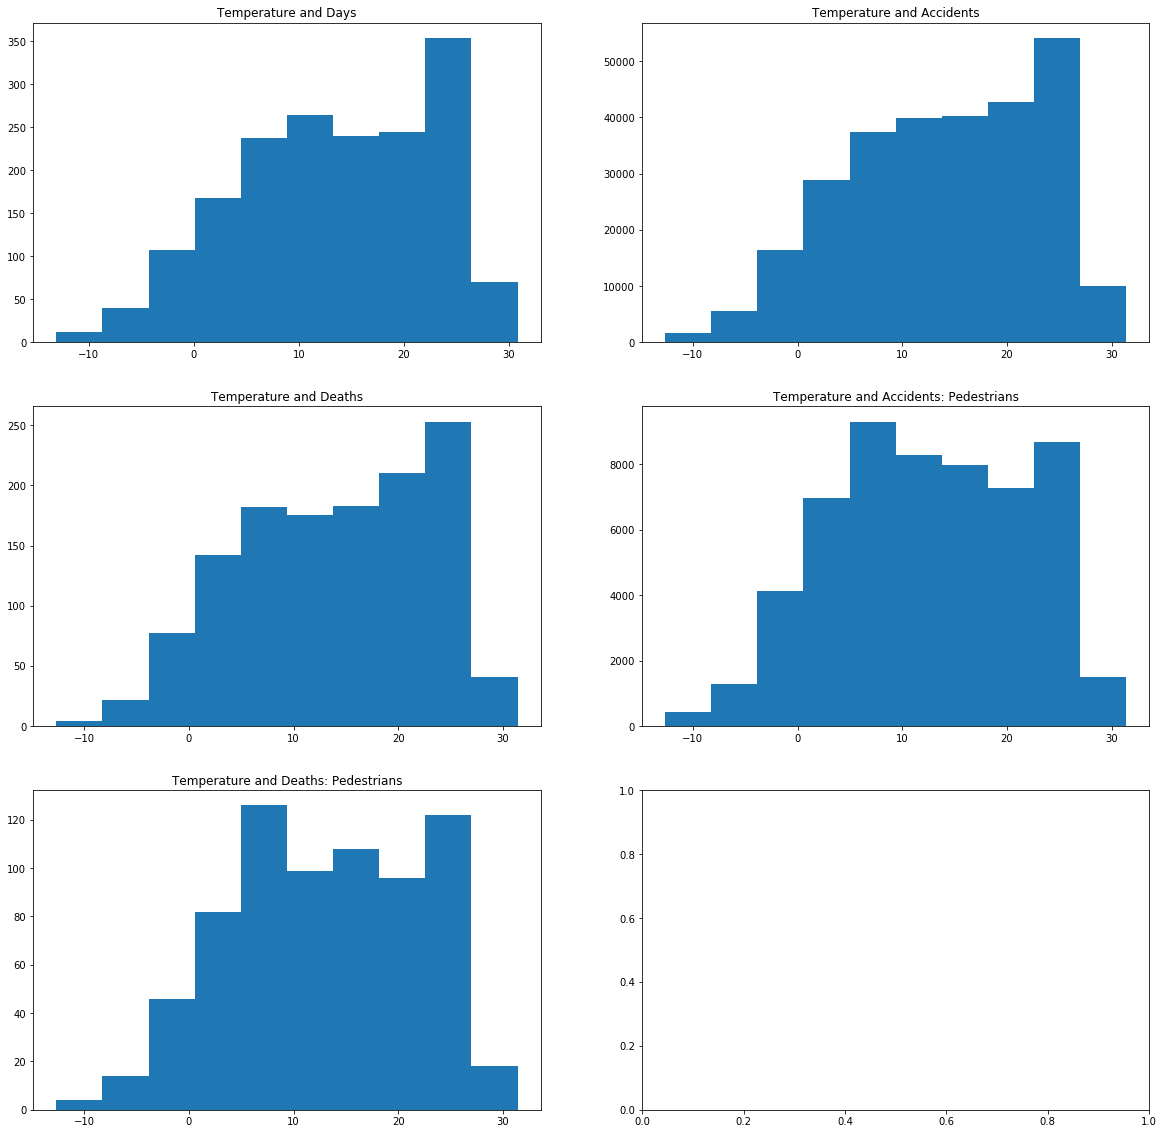

In [262]:

plt.subplots(3, 2, figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.hist(df_weather['TAVG'].dropna())
plt.title("Temperature and Days")

plt.subplot(3, 2, 2)
plt.hist(df_temp['TAVG'], weights=df_temp['NUMBER OF PERSONS INJURED'])
plt.title("Temperature and Accidents")

plt.subplot(3, 2, 3)
plt.hist(df_temp['TAVG'], weights=df_temp['NUMBER OF PERSONS KILLED'])
plt.title("Temperature and Deaths")

plt.subplot(3, 2, 4)
plt.hist(df_temp['TAVG'], weights=df_temp['NUMBER OF PEDESTRIANS INJURED'])
plt.title("Temperature and Accidents: Pedestrians")

plt.subplot(3, 2, 5)
plt.hist(df_temp['TAVG'], weights=df_temp['NUMBER OF PEDESTRIANS KILLED'])
plt.title("Temperature and Deaths: Pedestrians")

plt.show()

### More snow leads to more accidents and more passenger related accidents

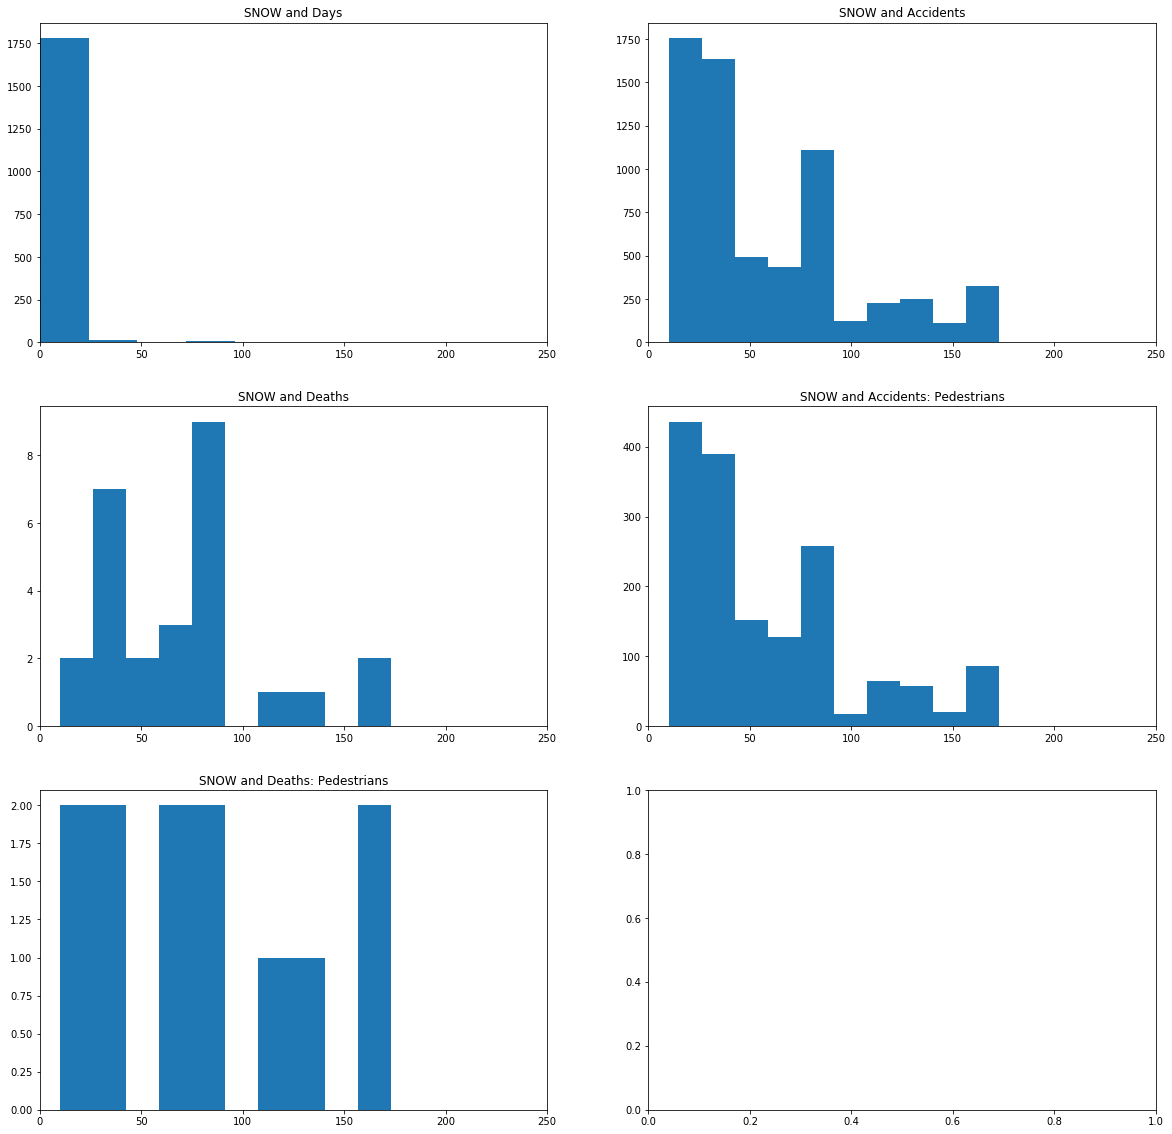

In [310]:
plt.subplots(3, 2, figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.hist(df_weather['SNOW'].dropna(), bins=32)
plt.title("SNOW and Days")
plt.xlim((0,250))

plt.subplot(3, 2, 2)
plt.hist(df_snow['SNOW'], weights=df_snow['NUMBER OF PERSONS INJURED'])
plt.title("SNOW and Accidents")
plt.xlim((0,250))

plt.subplot(3, 2, 3)
plt.hist(df_snow['SNOW'], weights=df_snow['NUMBER OF PERSONS KILLED'])
plt.title("SNOW and Deaths")
plt.xlim((0,250))

plt.subplot(3, 2, 4)
plt.hist(df_snow['SNOW'], weights=df_snow['NUMBER OF PEDESTRIANS INJURED'])
plt.title("SNOW and Accidents: Pedestrians")
plt.xlim((0,250))

plt.subplot(3, 2, 5)
plt.hist(df_snow['SNOW'], weights=df_snow['NUMBER OF PEDESTRIANS KILLED'])
plt.title("SNOW and Deaths: Pedestrians")

plt.xlim((0,250))
plt.show()

### Wind has no effect

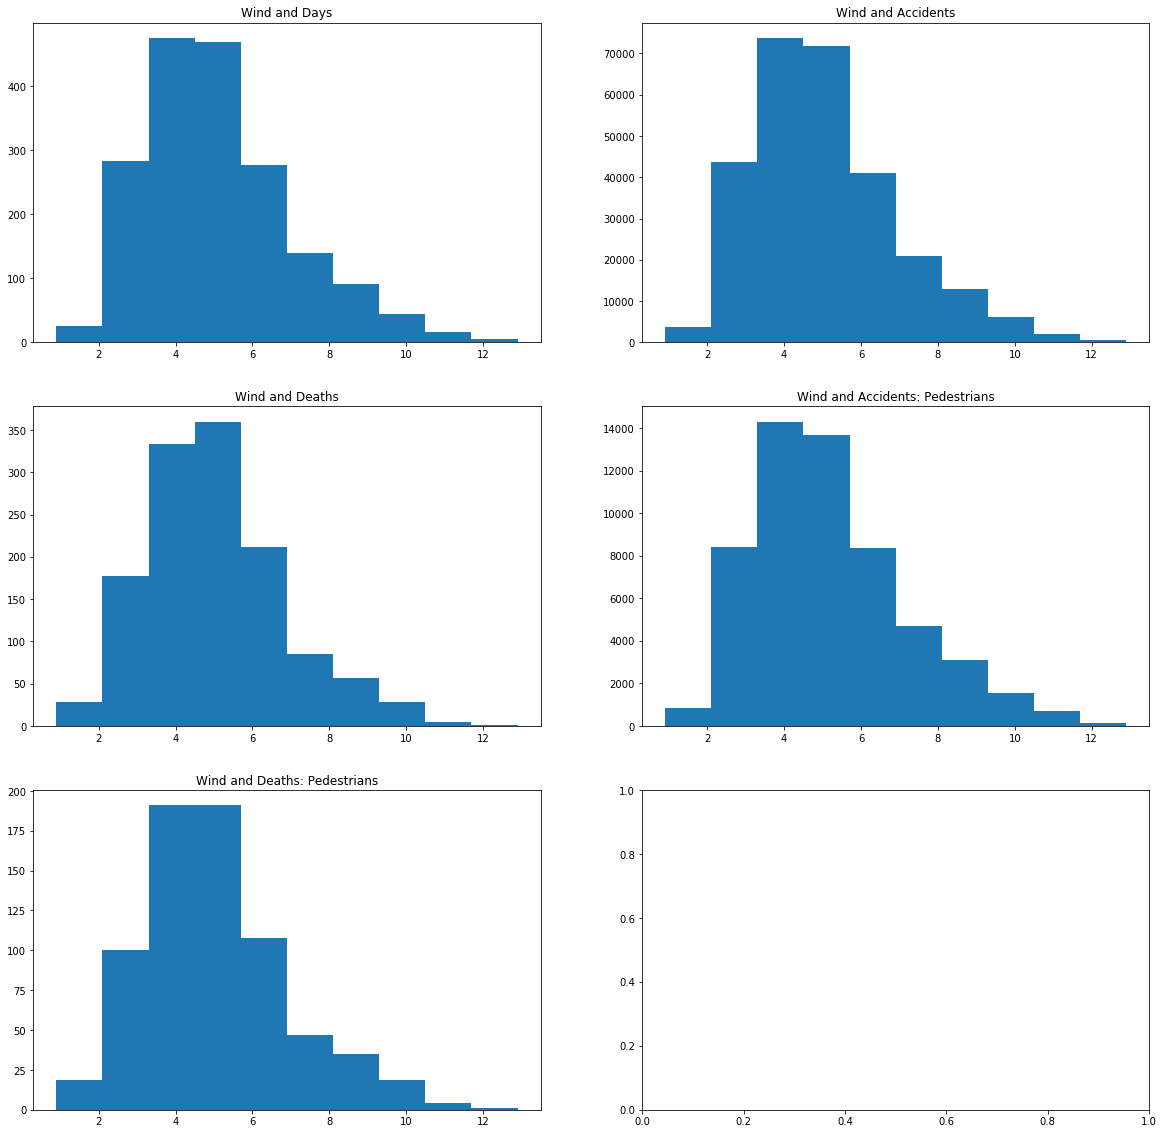

In [283]:
plt.subplots(3, 2, figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.hist(df_weather['AWND_m_s'].dropna())
plt.title("Wind and Days")

plt.subplot(3, 2, 2)
plt.hist(df_wind['AWND_m_s'], weights=df_wind['NUMBER OF PERSONS INJURED'])
plt.title("Wind and Accidents")

plt.subplot(3, 2, 3)
plt.hist(df_wind['AWND_m_s'], weights=df_wind['NUMBER OF PERSONS KILLED'])
plt.title("Wind and Deaths")

plt.subplot(3, 2, 4)
plt.hist(df_wind['AWND_m_s'], weights=df_wind['NUMBER OF PEDESTRIANS INJURED'])
plt.title("Wind and Accidents: Pedestrians")

plt.subplot(3, 2, 5)
plt.hist(df_wind['AWND_m_s'], weights=df_wind['NUMBER OF PEDESTRIANS KILLED'])
plt.title("Wind and Deaths: Pedestrians")

plt.show()

### Precipitation definitely affects accidents and pedestrian involvement

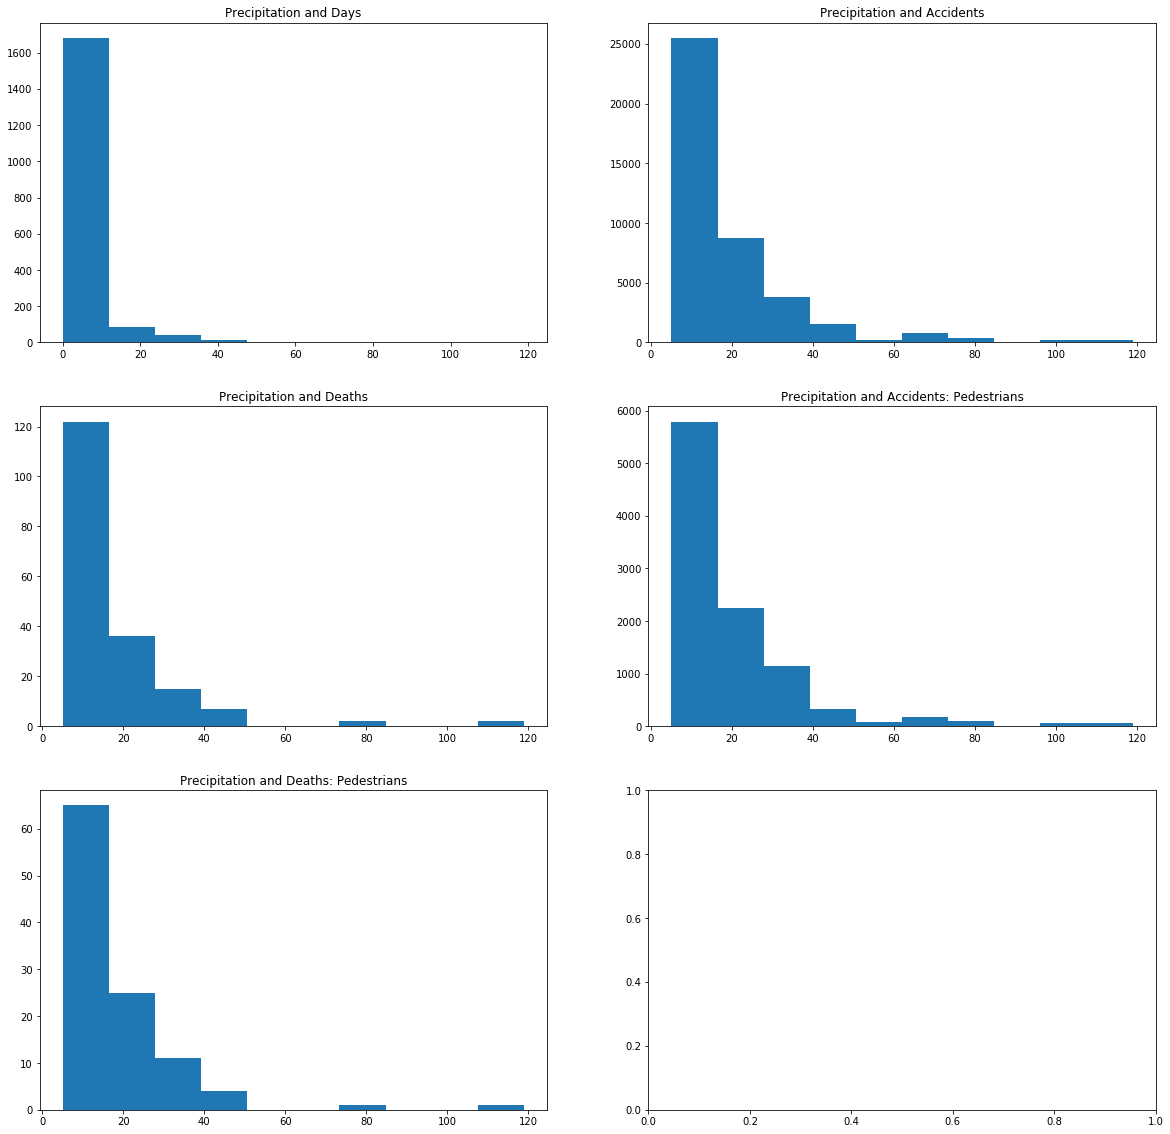

In [312]:
plt.subplots(3, 2, figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.hist(df_weather['PRCP'].dropna())
plt.title("Precipitation and Days")

plt.subplot(3, 2, 2)
plt.hist(df_prcp['PRCP'], weights=df_prcp['NUMBER OF PERSONS INJURED'])
plt.title("Precipitation and Accidents")

plt.subplot(3, 2, 3)
plt.hist(df_prcp['PRCP'], weights=df_prcp['NUMBER OF PERSONS KILLED'])
plt.title("Precipitation and Deaths")

plt.subplot(3, 2, 4)
plt.hist(df_prcp['PRCP'], weights=df_prcp['NUMBER OF PEDESTRIANS INJURED'])
plt.title("Precipitation and Accidents: Pedestrians")

plt.subplot(3, 2, 5)
plt.hist(df_prcp['PRCP'], weights=df_prcp['NUMBER OF PEDESTRIANS KILLED'])
plt.title("Precipitation and Deaths: Pedestrians")

plt.show()

### Fog: No corr

In [293]:
df_final[df_final['fog']==0][['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
count,935544.000000,935544.000000,935544.000000,935544.000000
mean,0.255692,0.001217,0.051207,0.000663
std,0.657475,0.037271,0.236296,0.027071
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,43.000000,8.000000,27.000000,8.000000


In [294]:
df_final[df_final['fog']==1][['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
count,309710.000000,309710.000000,309710.000000,309710.000000
mean,0.258093,0.001075,0.055029,0.000630
std,0.649671,0.034594,0.245677,0.025594
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,32.000000,3.000000,6.000000,2.000000
